# **Assignment 3 - Part B_3**

## **Using pure pytorch tensor data structure to build a 3 layer neural network using high level primitives**

In [1]:
##Importing the required libraries
import torch 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#Initializing weight matrix
data = [[1,2,3], [4,5,6]]
a = torch.tensor(data)
a.shape

torch.Size([2, 3])

In [3]:
##Initializing values for bias with appropriate dimensions
bias = [[1],[0.5]]
bias = torch.tensor(bias)
print(bias.shape)

torch.Size([2, 1])


In [4]:
##Generating 3d input and calculating y_true value
n = 500
d = 3
x = torch.rand(n, d)
a = a.T

## y1 = x_1^2 + 2 * x_2^2 + 3 * x_3^2 + x_1 + 2 * x_2 + 3 * x_3 + 1
## y2 = 4 * x_1^2 + 5 * x_2^2 + 6 * x_3^2 + 4 * x_1 + 5 * x_2 + 6 * x_3 + 0.5
##Calculating actual output for the data

y_true = torch.matmul(x.float().pow(2), a.float()) + torch.matmul(x.float(), a.float()) + bias.T.float()

##Checking shapes for input, weight, bias and output tensors
print(f'x: {x.shape}, weights: {a.shape}, bias: {bias.shape}, y: {y_true.shape}')

x: torch.Size([500, 3]), weights: torch.Size([3, 2]), bias: torch.Size([2, 1]), y: torch.Size([500, 2])


In [5]:
y_true.shape

torch.Size([500, 2])

In [6]:
##Visualizing the data distribution using TSNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_jobs=5).fit_transform(x)
tsne.shape

(500, 2)

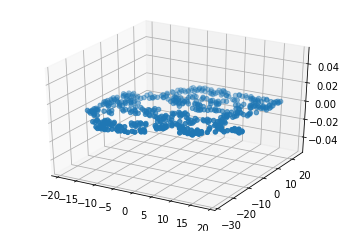

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(*zip(*tsne))
plt.show()

In [8]:
import torch.nn as nn

##Defining the model class to stack the 3 layers creating the neural net
class TorchModel(nn.Module):
  def __init__(self, input_dim, num_hidden):
    super().__init__()
    self.linear1 = nn.Linear(input_dim, num_hidden)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(num_hidden, 2)
  
  def forward(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2

##Checking for the initial loss value
##Calculating loss using pytorch loss module
loss = nn.MSELoss()
model = TorchModel(d, 4)
x_tensor = torch.tensor(x).float()
y_true_tensor = torch.tensor(y_true).float()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(113.5579, grad_fn=<MseLossBackward>)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [9]:
##Function for tsne plot visualization
def tsne_plot(tsne, y, y_pred=None):
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(tsne[:, 0], tsne[:, 1], y[:, 0], label='underlying function')
  if y_pred is not None:
    ax.scatter(tsne[:, 0], tsne[:, 1], y_pred[:, 0], label='our function')
  plt.legend()

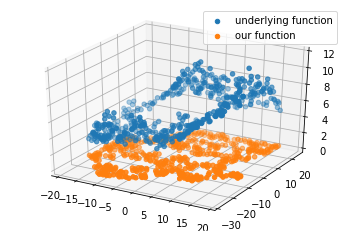

In [10]:
##Visualizing the data distribution using TSNE
tsne_plot(tsne, y_true, model(x_tensor).detach())

In [11]:
def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y[:, 0], label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred[:, 0], label='our function')
  plt.legend()

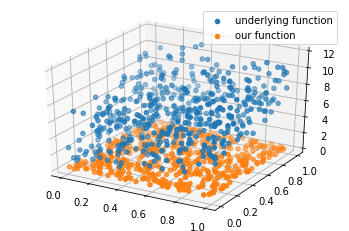

In [12]:
plot_3d(x, y_true, model(x_tensor).detach())

In [13]:
##Test just one forward and backward step
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

##Checking for initial loss values to make sure its reducing
optimizer.zero_grad()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)
loss_gradient = loss_value.backward()
optimizer.step()

y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(113.5579, grad_fn=<MseLossBackward>)
tensor(77.1662, grad_fn=<MseLossBackward>)


In [14]:
# Now we run the training loop
from typing import Callable

def torch_fit(x, y, model: Callable, loss: Callable, lr: float, num_epochs: int):
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred_tensor = model(x_tensor)
    loss_value = loss(y_pred_tensor, y_true_tensor)
    print(loss_value)
    loss_value.backward()
    optimizer.step()

torch_fit(x_tensor, y_true_tensor, model=model, loss=loss, lr=0.1, num_epochs=30)

tensor(77.1662, grad_fn=<MseLossBackward>)
tensor(8.8510, grad_fn=<MseLossBackward>)
tensor(17.4185, grad_fn=<MseLossBackward>)
tensor(59.9768, grad_fn=<MseLossBackward>)
tensor(5.9027, grad_fn=<MseLossBackward>)
tensor(7.8467, grad_fn=<MseLossBackward>)
tensor(16.7816, grad_fn=<MseLossBackward>)
tensor(58.0994, grad_fn=<MseLossBackward>)
tensor(4.2450, grad_fn=<MseLossBackward>)
tensor(3.8794, grad_fn=<MseLossBackward>)
tensor(3.6495, grad_fn=<MseLossBackward>)
tensor(3.9466, grad_fn=<MseLossBackward>)
tensor(6.9843, grad_fn=<MseLossBackward>)
tensor(18.0224, grad_fn=<MseLossBackward>)
tensor(63.4674, grad_fn=<MseLossBackward>)
tensor(10.5904, grad_fn=<MseLossBackward>)
tensor(20.0003, grad_fn=<MseLossBackward>)
tensor(59.0791, grad_fn=<MseLossBackward>)
tensor(19.2099, grad_fn=<MseLossBackward>)
tensor(14.2042, grad_fn=<MseLossBackward>)
tensor(39.7333, grad_fn=<MseLossBackward>)
tensor(2.7192, grad_fn=<MseLossBackward>)
tensor(2.9419, grad_fn=<MseLossBackward>)
tensor(4.5664, grad_f

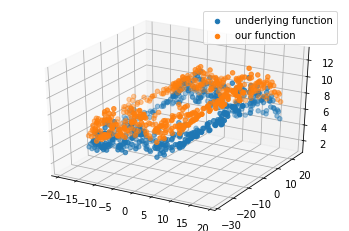

In [15]:
##Visualizing the data distribution using TSNE after training
tsne_plot(tsne, y_true, model(x_tensor).detach())

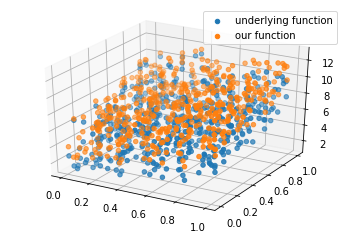

In [16]:
##Visualizing the shape of data after training
plot_3d(x, y_true, model(x_tensor).detach())

We can see how after training, the shape of the data before and after is now similar/overlapping